# Random Forest on the Dataset

### Pre-processing data:

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

df = pd.read_csv('Spotify_10k.csv')
df = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year', 'genre', 'mode', 'popularity', 'duration_ms', 'time_signature'])

X = df[['energy', 'valence', 'acousticness', 'tempo', 'loudness']]
y = df['Mood']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)



### Building and Training Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

### Confusion Matrix of the Random Forest

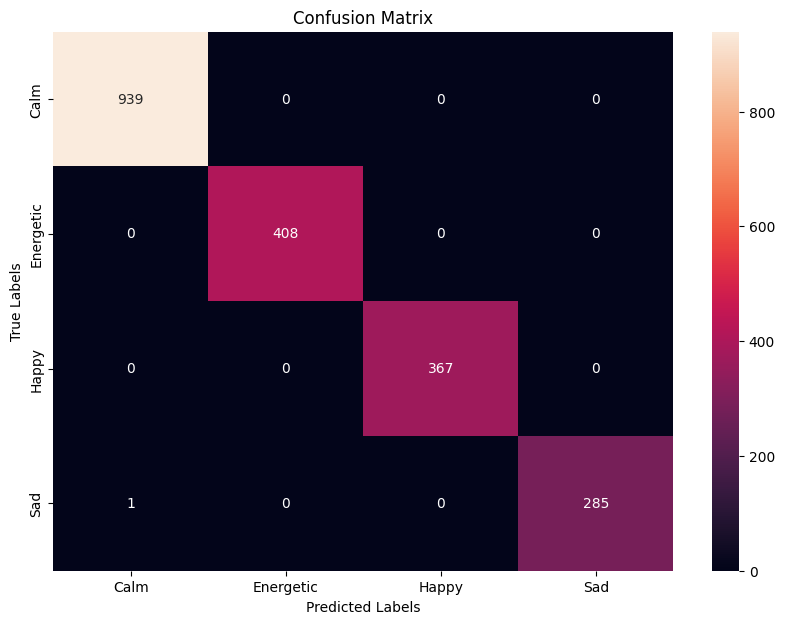

Accuracy Score: 1.00
────────────────────────────────────────────────────────────
Classification Report:
              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00       939
   Energetic       1.00      1.00      1.00       408
       Happy       1.00      1.00      1.00       367
         Sad       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [21]:
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy Score: {accuracy:.2f}")
print("─" * 60)
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


### GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

grid_predictions = best_grid.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
grid_predictions_labels = encoder.inverse_transform(grid_predictions)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test_labels, grid_predictions_labels))

print("─" * 60)
print("Classification Report:\n")
print(classification_report(y_test_labels, grid_predictions_labels))

print("─" * 60)
print("Best Parameters:\n", grid_search.best_params_)
print(f"Best Grid Accuracy: {accuracy_score(y_test_labels, grid_predictions_labels):.2f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Confusion Matrix:

[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]
────────────────────────────────────────────────────────────
Classification Report:

              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00       939
   Energetic       1.00      1.00      1.00       408
       Happy       1.00      1.00      1.00       367
         Sad       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

────────────────────────────────────────────────────────────
Best Parameters:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Grid Accuracy: 1.00


### RandomizedSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder

rf_classifier = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 1100, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("─" * 60)
best_rf = rf_random.best_estimator_

predictions = best_rf.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
predictions_labels = encoder.inverse_transform(predictions)

print(confusion_matrix(y_test_labels, predictions_labels))
print("─" * 60)

print(classification_report(y_test_labels, predictions_labels))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
────────────────────────────────────────────────────────────
[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]
────────────────────────────────────────────────────────────
              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00       939
   Energetic       1.00      1.00      1.00       408
       Happy       1.00      1.00      1.00       367
         Sad       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Bayesian Optimization:

In [39]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the parameter search space
space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 500, 800, 1200]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40, 50]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 4, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

# Objective function for Hyperopt
def objective(params):
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])
    
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Trials to track the search progress
trials = Trials()

# Perform the search
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

# Map the best hyperparameters from the search space
best_params = {
    'n_estimators': [100, 200, 300, 500, 800, 1200][best['n_estimators']],
    'max_depth': [None, 10, 20, 30, 40, 50][best['max_depth']],
    'max_features': ['sqrt', 'log2', None][best['max_features']],
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]
}

print("Best Hyperparameters:", best_params)

# Train the best model with the optimized hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual labels
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Print confusion matrix
print("─" * 60)
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Print classification report
print("─" * 60)
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Print accuracy score
print("─" * 60)
print("Accuracy Score:", accuracy_score(y_test_labels, y_pred_labels))


100%|████████████████████████████████████████████████████████| 100/100 [39:57<00:00, 23.97s/trial, best loss: -0.99975]
Best Hyperparameters: {'n_estimators': 500, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy'}
────────────────────────────────────────────────────────────
Confusion Matrix:
[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  0   0   0 286]]
────────────────────────────────────────────────────────────
Classification Report:
              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00       939
   Energetic       1.00      1.00      1.00       408
       Happy       1.00      1.00      1.00       367
         Sad       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

─────────────────────────────────────────────────